# Histogram Equalization

Firstly, we will see its Numpy implementation

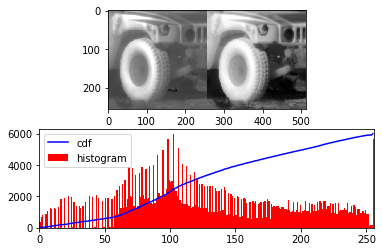

In [1]:
import cv2 as  cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('D:\\CodingFolder\\OPENCVFolder\\OPENCV-Python\\resource\\7_1_hist.png')

hists, bins = np.histogram(img.flatten(), 256, [0,256])

# return the cumulative sum of the elements along the given axis
cdf = hists.cumsum()
cdf_normalized = cdf * hists.max()/ cdf.max()

plt.subplot(211), plt.imshow(img, 'gray')
plt.subplot(212), plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()

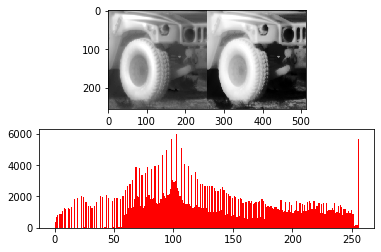

In [2]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max() - cdf_m.min()) 
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
img2 = cdf[img]
plt.subplot(211),plt.imshow(img2, 'gray')
plt.subplot(212),plt.hist(img.flatten(),256,[0,256],color='r')
plt.show()

## Histogram Equalization in OpenCV


In [3]:
# zero equal to grayimage
img = cv.imread('D:\\CodingFolder\\OPENCVFolder\\OPENCV-Python\\resource\\7.png', 0)
equ = cv.equalizeHist(img)
res = np.hstack((img, equ))
cv.imwrite('D:\\CodingFolder\\OPENCVFolder\\OPENCV-Python\\resource\\7_1_hist.png', res)

True

# CLAHE(Constrast Limited Adaptive Histogram Equalization)

The above Histogram Equalization considers the global constrast of the image.

将图像分为一个个小块，对小块做直方图均衡化


In [6]:
import numpy as np
import cv2 as cv

img = cv.imread('D:\\CodingFolder\\OPENCVFolder\\OPENCV-Python\\resource\\7.png',0)

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
res = np.hstack((img, cl1))
cv.imwrite('7_2_clahe.png', res)

True